# Projeto: Historical analysis of American bombings during World War II / Análise histórica de bombardeios norte-americanos durante a Segunda Guerra Mundial

### João Leopoldo e  Silva

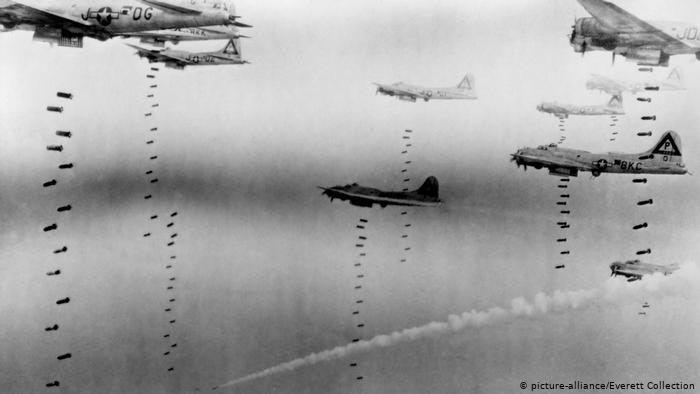

In [3]:
from IPython.display import Image
Image(filename="bombardeio.jpg", width=400, height=400)

#![title](bombardeio.jpg)

## Introdução:
Queria fazer um levantamento sobre a batalha de Stalingrado (1943), mas não encontrei os dados. Encontrei, no entando um dataset sobre as Operações de Bombardeios Aéreos Norte-Americanos durante a Segunda Guerra Mundial (1939-1945). Este dataset, retrata uma dentre as diversas histórias sobre bombardeios que ocorreram ao longo da guerra. Isso diz tanto sobre a presença dos EUA na internet como também conta a história dos vencedores da guerra.

#### Objetivos:
Pesquisa de caráter explorartório sobre Bombardeios Aéreos Norte-Americanos durante a Segunda Guerra Mundial [Aerial Bombing Operations in World War II]

>1- Quantas operações cada país presente do dataset realizou?

>1-a- Quantas toneladas de bombas foram jogadas por ano?

>1-b- Quais esquadrões mais participaram? Quais eram seus principais aviões?

>2- Qual país foi o principal alvo?

>2-a- Quais foram os principais tipos de alvos?

>2-b- Quais cidades? Quantas toneladas de bombas foram jogadas em cada cidade?

>BÔNUS: 3- Tentar georreferenciar em mapa o alvo das missões, se possível aumentar a bola indicando quantidade de bombas despejadas no local (geocoder, geopandas)


#### Acesso ao dataset:
> USAF. Aerial Bombing Operations in World War II. Kaggle. Acesso: <https://www.kaggle.com/usaf/world-war-ii>

#### Acesso a apresentação:
> https://docs.google.com/presentation/d/1tmHrsPlBjqMRmRX7tdn6jCPCg249U8z5QjpXNJaQm1U/edit?usp=sharing

In [3]:
import os
#aqui vc precisa colocar o caminho do seu computador
os.environ['PROJ_LIB'] ='C:\\Users\\computador\\Anaconda3\\Library\\share'

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [6]:
try:
    from inspect import cleandoc as dedent
except ImportError:
    # Deprecated as of version 3.1. Not quite the same
    # as textwrap.dedent.
    from matplotlib.cbook import dedent

In [7]:
#tipo fundo dos gráficos
sns.set_style('darkgrid')

***

### IMPORTAÇÃO E PREPARAÇÃO DO DATAFRAME
#### 1 - importação do arquivo em .csv e verificação de seu conteúdo (exploração inicial)

In [5]:
data = pd.read_csv('data\\ww2-aerial-operations.csv', low_memory=False)

data
#data.info()
#data.describe()
#data.columns()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


#### 2 - limpeza do dataframe visando ficar apenas com as colunas que possam responder minhas perguntas

In [6]:
data = data.rename(columns={'Mission ID':'id',
                            'Mission Date':'date',
                            'Theater of Operations':'theater_of_op',
                            'Country':'country',
                            'Unit ID':'unit_id',
                            'Target Country':'targ_country',
                            'Target City':'targ_city',
                            'Target Type':'targ_type',
                            'Target Priority':'targ_prio',
                            'Target Industry':'targ_industry',
                            'Bomb Damage Assessment':'bomb_dmg_asses',
                            'Target Latitude':'targ_lat',
                            'Target Longitude':'targ_long',
                            'Altitude (Hundreds of Feet)':'altitude',
                            'Total Weight (Tons)':'total_exp_tons',
                            'Aircraft Series':'air_series'})

In [7]:
data = data[['id','date','theater_of_op','air_series','country','unit_id','targ_country','targ_city','targ_type','targ_industry','targ_prio','targ_lat','targ_long','altitude','total_exp_tons', 'bomb_dmg_asses']]

In [8]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

In [ ]:
CRIAR FUNÇÃO PARA GERAR O CÓDIGO DE RENOMEAR AS COLUNAS
-título da coluna vira td minúsculo
-espaço vira _

def limpar_nome_colunas():
    '''
    Conversor de nome de colunas:
    Essa função pega o nome das colunas de um dataset, transforma todas as letras
    em lower e substitui espaços entre palavras com o underline '_'
    '''
    data_col_lip = {}
    
    return data

***

# ANÁLISE DOS DADOS E IMPRESSÃO DE GRÁFICOS

## Quantas operações cada país presente do dataset realizou? Quantas operações por ano?

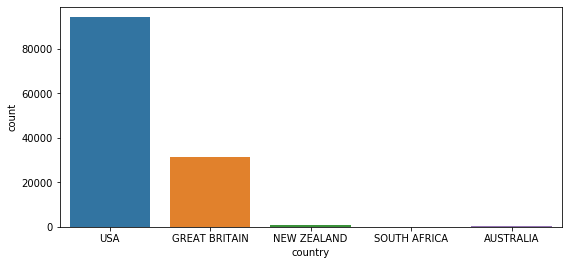

In [9]:
#data['country'].describe()

plt.figure(figsize=(9,9*0.45))
sns.countplot(x='country', data=data);

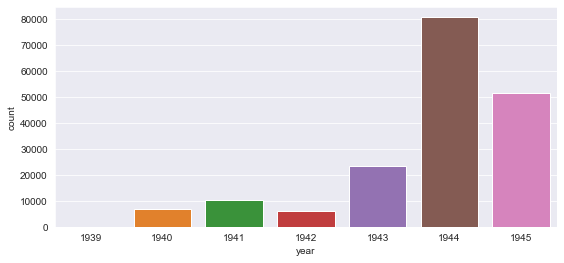

In [16]:
#quantas missões por ano (calculando apenas por ano pois cada id do dataset é uma missão)

#data['year'].describe()
plt.figure(figsize=(9,9*0.45))
sns.countplot(x='year', data=data);

## Quantas toneladas de bombas foram jogadas por ano?

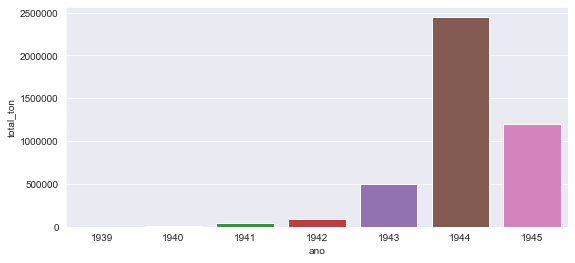

In [17]:
tons_ano = data[["year","total_exp_tons"]]
tons_ano = tons_ano.groupby(["year"]).sum().reset_index()
tons_ano.columns = ['ano', 'total_ton']
tons_ano['total_ton'] = tons_ano['total_ton'].apply(lambda x: round(x))

plt.figure(figsize=(9,9*0.45))
sns.barplot(data=tons_ano, x="ano", y="total_ton");

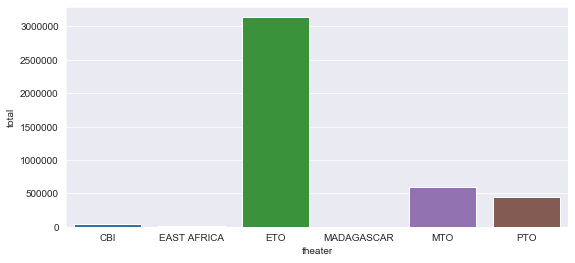

In [18]:
theater_of_op_tons = data[["theater_of_op","total_exp_tons"]]
theater_of_op_tons = theater_of_op_tons.groupby(["theater_of_op"]).sum().reset_index()
theater_of_op_tons.columns = ['theater', 'total']
theater_of_op_tons['total'] = theater_of_op_tons['total'].apply(lambda x: round(x))

plt.figure(figsize=(9,9*0.45))
sns.barplot(data=theater_of_op_tons, x="theater", y="total");

## Quais esquadrões mais participaram? Dos que participaram de mais missões (>550), quantas bombas jogaram?

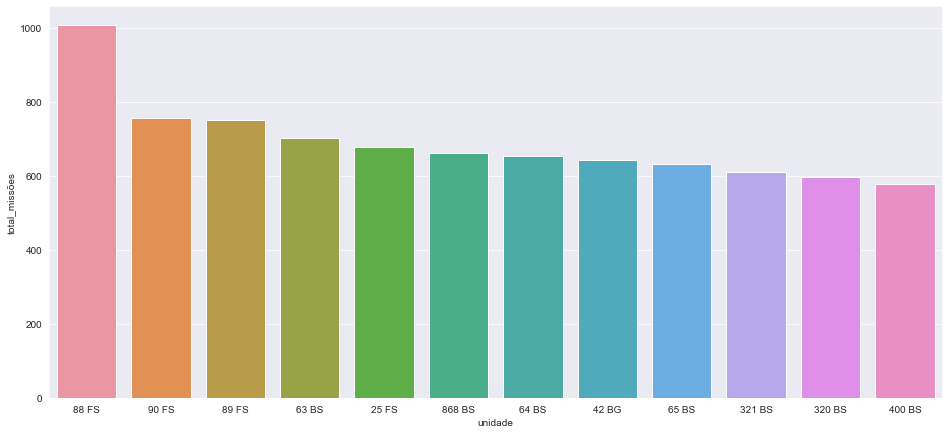

In [19]:
unit_id_data = data["unit_id"].value_counts().to_frame()
unit_id_data = unit_id_data[unit_id_data["unit_id"] > 550].dropna().reset_index()
unit_id_data.columns=['unidade','total_missões']

plt.figure(figsize=(16,16*0.45))
sns.barplot(data=unit_id_data, x="unidade", y="total_missões");

In [20]:
unit_id_tons1 = data[["unit_id"]]

unit_id_tons1 = unit_id_tons1["unit_id"].value_counts()
unit_id_tons1 = unit_id_tons1[unit_id_tons1 > 550]

unit_id_tons1

88 FS     1008
90 FS      756
89 FS      751
63 BS      703
25 FS      677
868 BS     662
64 BS      654
42 BG      644
65 BS      631
321 BS     610
320 BS     596
400 BS     579
Name: unit_id, dtype: int64

In [21]:
ton_bombas = ['88 FS','90 FS','89 FS','63 BS','25 FS','868 BS','64 BS','42 BG','65 BS','321 BS','320 BS','400 BS']

teste1 = data[data.unit_id.isin(ton_bombas)]

teste1[['unit_id', 'total_exp_tons']].groupby('unit_id').sum().reset_index()

,unit_id,total_exp_tons
0,25 FS,766.0
1,320 BS,6665.0
2,321 BS,6743.0
3,400 BS,6738.0
4,42 BG,3770.0
5,63 BS,2122.0
6,64 BS,6984.0
7,65 BS,6213.0
8,868 BS,1552.0
9,88 FS,1503.0


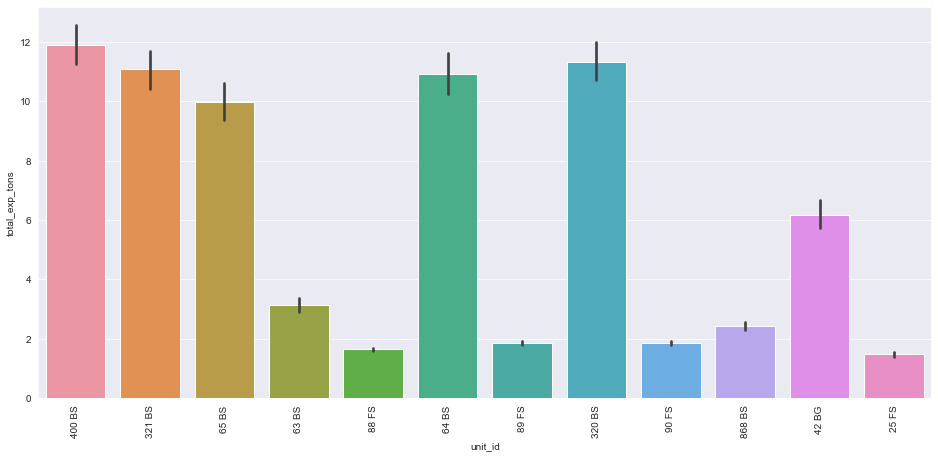

In [17]:
plt.figure(figsize=(16,16*0.45))
plt.xticks(rotation=90)
sns.barplot(data=teste1, x="unit_id", y="total_exp_tons");

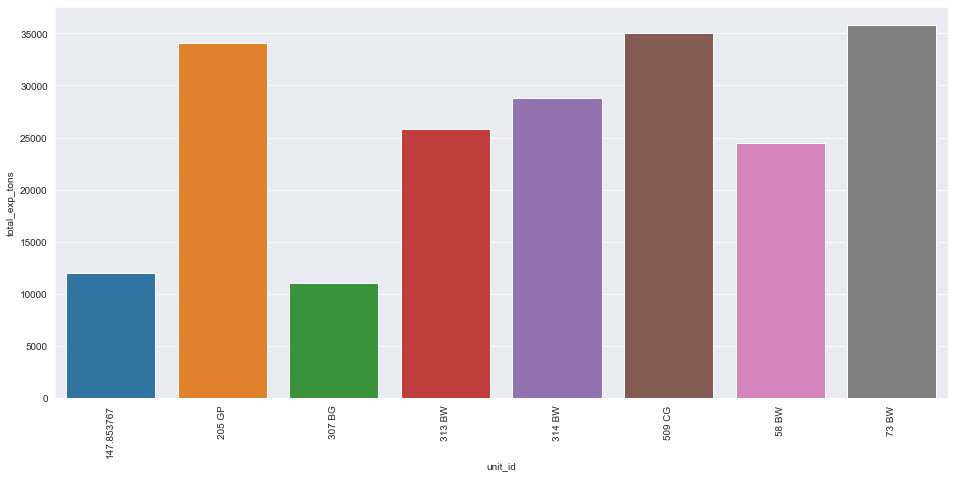

In [18]:
unit_id_tons = data[["unit_id","total_exp_tons"]]
unit_id_tons = unit_id_tons.groupby(["unit_id"]).sum().reset_index()

#unit_id_tons.columns = ['unit_id', 'total']
#unit_id_tons['total'] = unit_id_tons['total'].apply(lambda x: round(x))

final_unit_id_tons = unit_id_tons[unit_id_tons['total_exp_tons'] >= 10000]

plt.figure(figsize=(16,16*0.45))
plt.xticks(rotation=90)
sns.barplot(data=final_unit_id_tons, x="unit_id", y="total_exp_tons");

## Qual país foi o principal alvo?

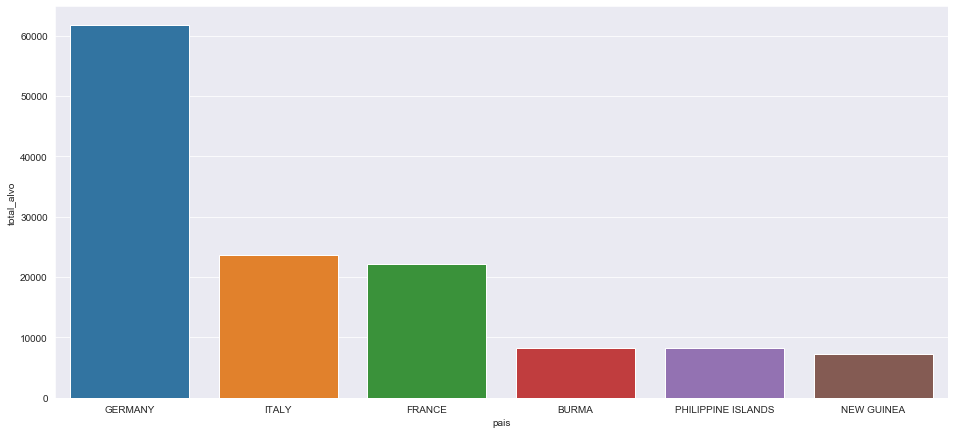

In [19]:
data['targ_country'].describe()

targ_country_data = data["targ_country"].value_counts().to_frame()
targ_country_data = targ_country_data[targ_country_data["targ_country"] > 6000].dropna().reset_index()
targ_country_data.columns=['pais','total_alvo']

plt.figure(figsize=(16,16*0.45))
sns.barplot(data=targ_country_data, x="pais", y="total_alvo");

## Quais foram os principais tipos de alvos?

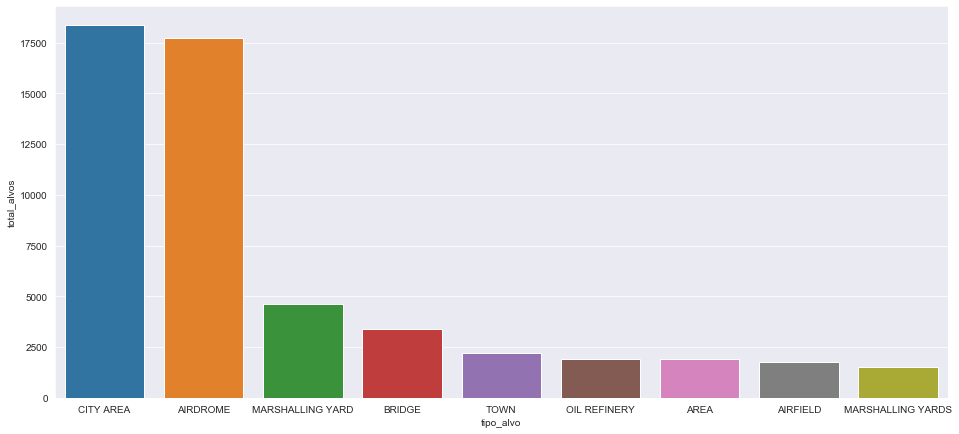

In [21]:
#>>FAZER SUBPLOT - INDICAR QUE AMBOS OS GRÁFICOS DIZEM A MESMA COISA

target_type = data['targ_type'].value_counts().to_frame()
target_type = target_type[target_type["targ_type"] > 1500].dropna().drop('UNIDENTIFIED TARGET').reset_index()
target_type.columns=['tipo_alvo','total_alvos']

plt.figure(figsize=(16,16*0.45))
sns.barplot(data=target_type, x="tipo_alvo", y="total_alvos");

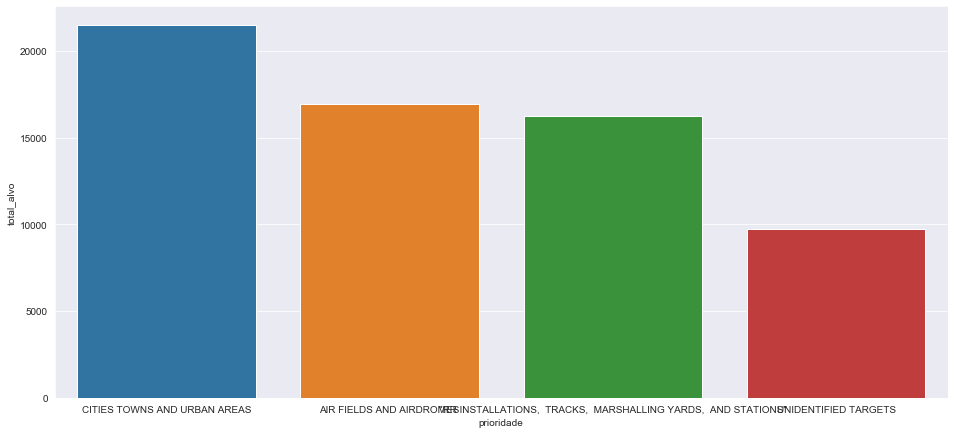

In [22]:
data['targ_industry'].describe()

targ_industry_data = data["targ_industry"].value_counts().to_frame()
targ_industry_data = targ_industry_data[targ_industry_data["targ_industry"] > 9000].dropna().reset_index()
targ_industry_data.columns=['prioridade','total_alvo']

plt.figure(figsize=(16,16*0.45))
sns.barplot(data=targ_industry_data, x="prioridade", y="total_alvo");

## Quais cidades? Quantas toneladas de bombas foram jogadas em cada cidade?

In [23]:
data['total_exp_tons'].describe()

count    166508.000000
mean         25.760326
std          90.643876
min           0.000000
25%           2.000000
50%           9.290000
75%          31.000000
max       20000.000000
Name: total_exp_tons, dtype: float64

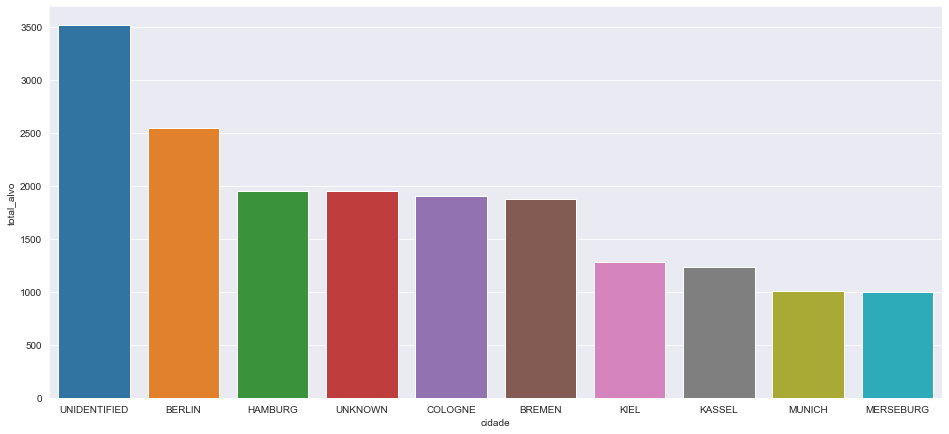

In [25]:
#>SCATTER NÚMERO DE BOMBARDEIOS POR ANO EM CADA CIDADE

#data['targ_city'].describe()

targ_city_data = data["targ_city"].value_counts().to_frame()
targ_city_data = targ_city_data[targ_city_data["targ_city"] > 1000].dropna().reset_index()
targ_city_data.columns=['cidade','total_alvo']

plt.figure(figsize=(16,16*0.45))
sns.barplot(data=targ_city_data, x="cidade", y="total_alvo");

In [26]:
tons_cidade = data[["targ_city","total_exp_tons"]]
tons_cidade = tons_cidade.groupby(["targ_city"]).sum().reset_index()
tons_cidade.columns = ['targ_city', 'total_tons']
tons_cidade['total_tons'] = tons_cidade['total_tons'].apply(lambda x: round(x))
#tons_cidade['targ_city'] = tons_cidade['targ_city']

tons_cidade

#plt.figure(figsize=(9,9*0.45))
#sns.barplot(data=tons_cidade, x="targ_city", y="total_tons");

,targ_city,total_tons
0,"""4 MI S OF AMBASI, 3.5 MI OFFSHORE""",2
1,"""ABU GHARAIS REGULATOR / EXPERIMENTAL FARM - ...",0
2,"""ADALIA """"ST DIDIER"""" VICHY SHIP """,0
3,"""AFMADU, DIF AND GOBWEN""",0
4,"""AFMADU, GODWEN, YAVELLO, NEGHELLI, LUGH FERRA...",0
...,...,...
10080,ZWILLBROCK,36
10081,ZWISCHENAHN,1848
10082,ZWOLFAXING,1335
10083,ZWOLLE,18


## Georreferenciamnto do alvo das missões

In [22]:
data_geo = data[['id','theater_of_op','targ_city','targ_lat','targ_long']]
data_geo

,id,theater_of_op,targ_city,targ_lat,targ_long
0,1,MTO,SPADAFORA,38.220000,15.370000
1,2,PTO,KOMIATUM,-7.166667,147.000000
2,3,MTO,COSENZA,39.270000,16.250000
3,4,MTO,GIOJA TAURO,38.430000,15.900000
4,5,PTO,KILA,-1.116667,103.883333
...,...,...,...,...,...
178276,178738,CBI,NAMTOI,22.833333,96.916667
178277,178739,CBI,MYITSON,21.433333,96.466667
178278,178740,CBI,MYITSON,21.433333,96.466667
178279,178741,PTO,KAVIENG SWEEP,-2.583333,150.833333


C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\computador\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:4790: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
C:\Users\computador\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:4791: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
C:\Users\computador\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:4797: RuntimeWarning: invalid 

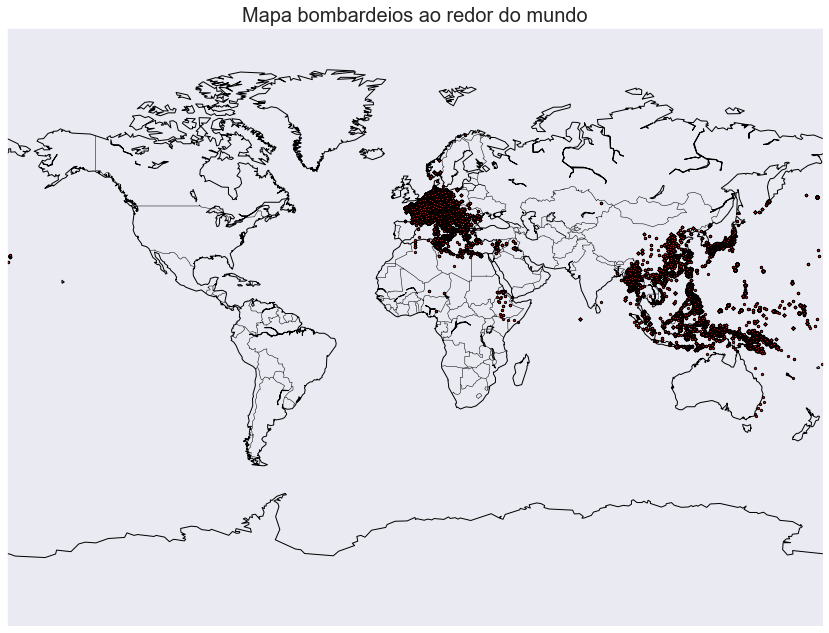

In [23]:
fig = plt.figure(figsize=(16,11))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()
m.drawcountries()

sites_lat_y = data_geo['targ_lat'].tolist()
sites_lon_x = data_geo['targ_long'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=5, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Mapa bombardeios ao redor do mundo', fontsize=20)

plt.show()

C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


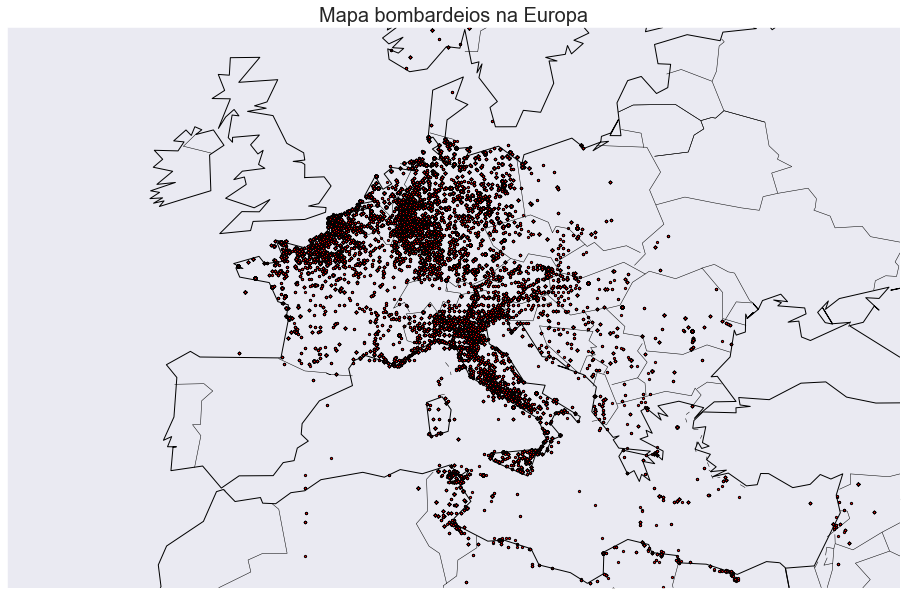

In [58]:
fig = plt.figure(figsize=(16,11))

m = Basemap(projection='mill',
           llcrnrlat = 30,
           urcrnrlat = 60,
           llcrnrlon = -20,
           urcrnrlon = 40,
           resolution = 'c')

m.drawcoastlines()
m.drawcountries()

sites_lat_y = data_geo['targ_lat'].tolist()
sites_lon_x = data_geo['targ_long'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=5, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Mapa bombardeios na Europa', fontsize=20)

plt.show()

C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


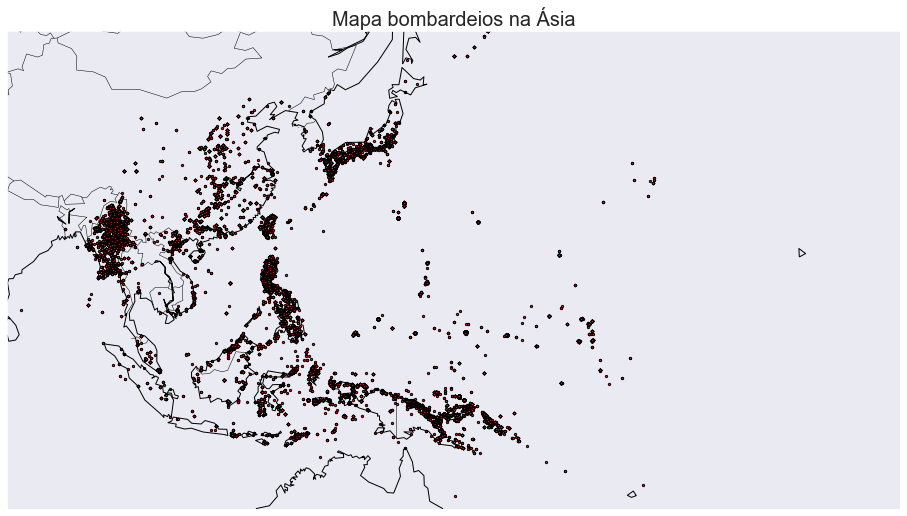

In [101]:
fig = plt.figure(figsize=(16,11))

m = Basemap(projection='mill',
           llcrnrlat = -20,
           urcrnrlat = 50,
           llcrnrlon = 80,
           urcrnrlon = 220,
           resolution = 'c')

m.drawcoastlines()
m.drawcountries()

sites_lat_y = data_geo['targ_lat'].tolist()
sites_lon_x = data_geo['targ_long'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=5, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Mapa bombardeios na Ásia', fontsize=20)

plt.show()

C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


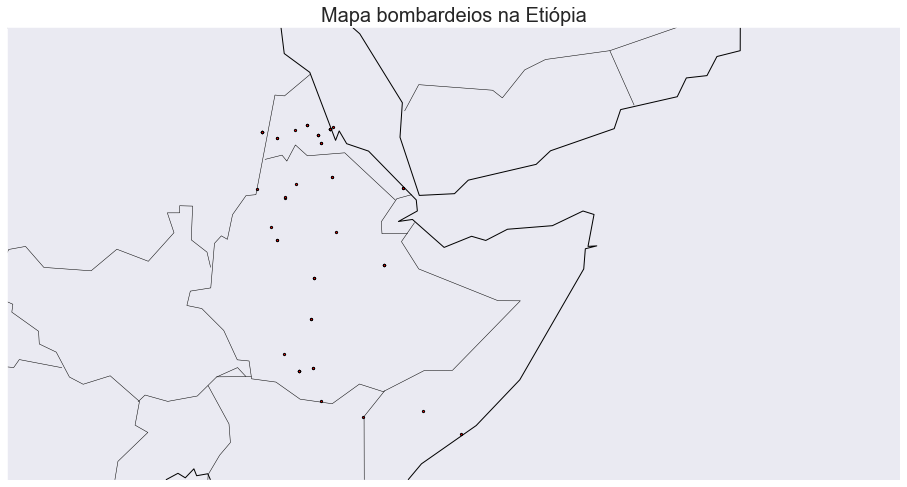

In [156]:
fig = plt.figure(figsize=(16,11))

m = Basemap(projection='mill',
           llcrnrlat = 0,   # -
           urcrnrlat = 20,  # +
           llcrnrlon = 25, # -
           urcrnrlon = 65,  # +
           resolution = 'c')

m.drawcoastlines()
m.drawcountries()

sites_lat_y = data_geo['targ_lat'].tolist()
sites_lon_x = data_geo['targ_long'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=5, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Mapa bombardeios na Etiópia', fontsize=20)

plt.show()

C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\computador\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


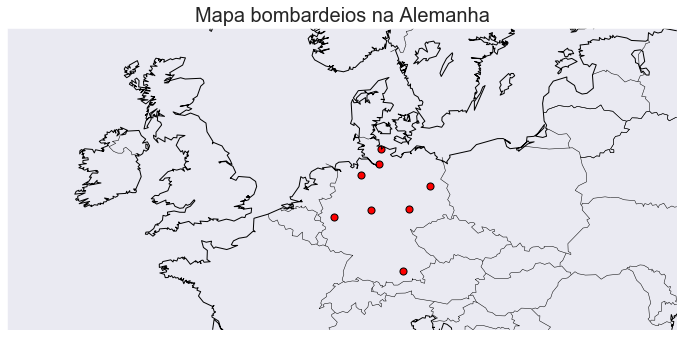

In [30]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 45,
           urcrnrlat = 60,
           llcrnrlon = -15,
           urcrnrlon = 30,
           resolution = 'l')

m.drawcoastlines()
m.drawcountries()

sites_lat_y = [52.52437,53.57532,50.941357,53.073635,54.323334,51.312801,48.137154,51.35478]
sites_lon_x = [13.41053,10.01534,6.958307,8.806422,10.139444,9.481544,11.576124,11.98923]

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=50, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Mapa bombardeios na Alemanha', fontsize=20)

plt.show()

#### REFERÊNCIAS

https://www.kaggle.com/cswingle/preliminary-look-at-the-data
    
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
    
https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas